### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [112]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observation

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Question 1: How many rows and columns are present in the data? [0.5 mark]

In [114]:
df.shape

(1898, 9)

#### Observation 

The dataset has 1898 rows and 9 columns

### Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observation

- All the columns has non-null values which indicates there are no missing values.
- There are 4 object type column and 5 numerical type column.
- Rating was classified for a object type but can as well be converted to a categorical type if needed.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observation

There are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observation


- The minimum time it takes for food to be prepared is 20minutes.
- The average time it takes for food to be prepared is 27.37minutes.
- The maximum time it takes for food to be prepared is 35minutes.

### Question 5: How many orders are not rated? [1 mark]

In [191]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observation

736 out of 1898 orders where not rated 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Restaurant_names

C:\Users\dubei\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dubei\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dubei\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dubei\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


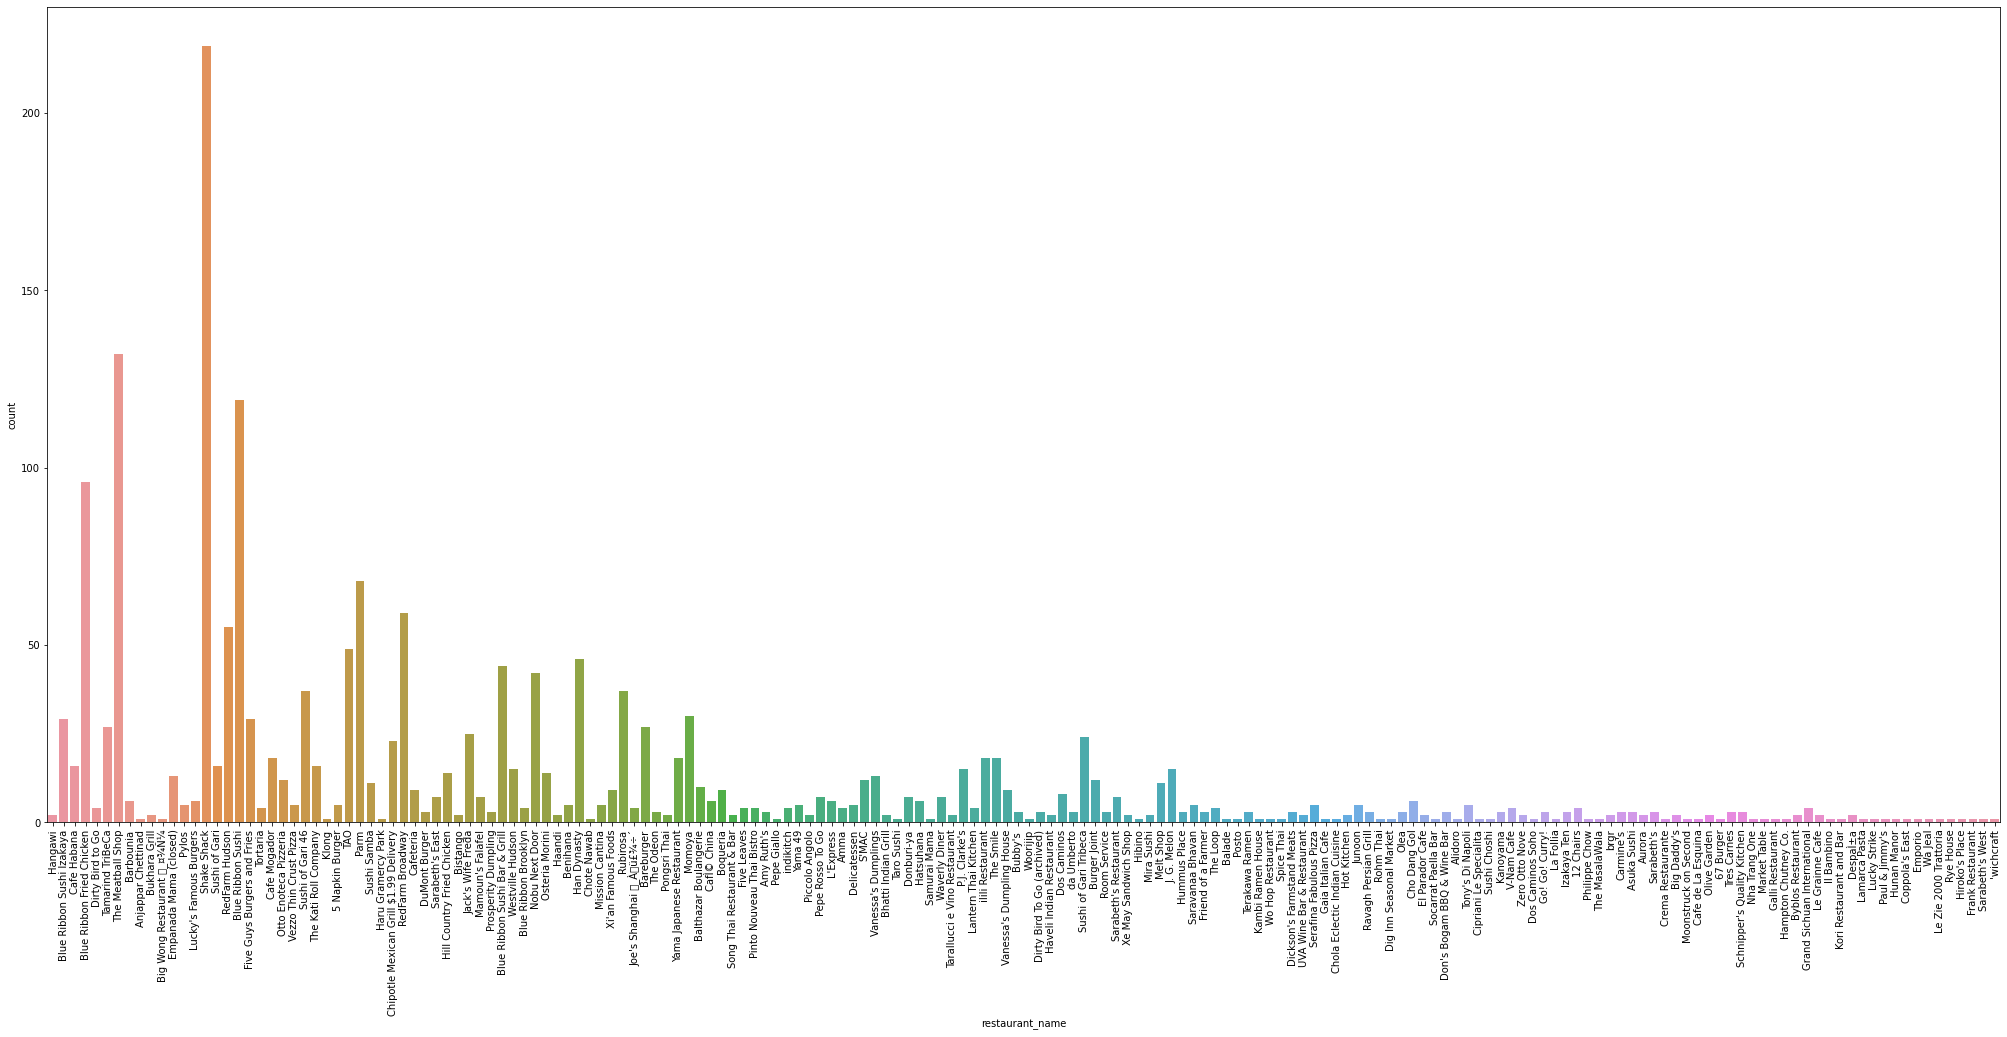

In [195]:
plt.figure(figsize=(35,15))
sns.countplot(x='restaurant_name',data=df)
plt.xticks(rotation=90)
plt.show()

#### Observation

- Shake Shack has the highest amount of placed order.
- The meatball shop, Blue Ribbon sushi and Blue Ribbon Fried chicken have the 2nd,3rd and 4th highest order count respectively.

#### Cuisine_type

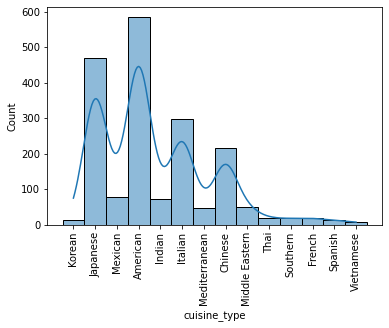

In [36]:
sns.histplot(data=df, x='cuisine_type',kde=True)
plt.xticks(rotation=90)
plt.show()

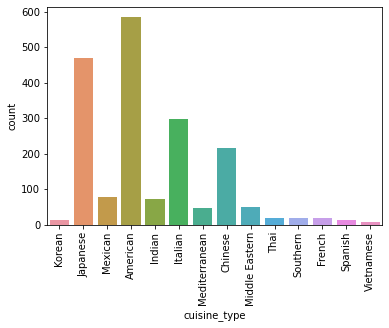

In [39]:
sns.countplot(x='cuisine_type',data=df,dodge=True)
plt.xticks(rotation=90)
plt.show()

#### Observation

American, Japanese and Italian cuisines are the top three cuisine ordered.

#### Cost_of_the_order

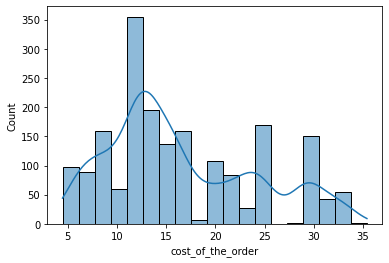

In [47]:
sns.histplot(data=df, x='cost_of_the_order',kde=True)
#plt.xticks(rotation=90)
plt.show()

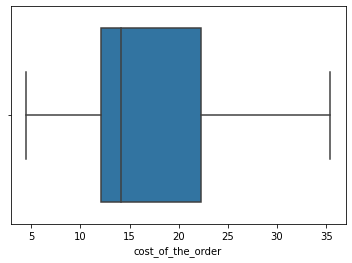

In [49]:
sns.boxplot(data=df, x='cost_of_the_order')
#plt.xticks(rotation=90)
plt.show()

#### Observation

- The median cost_of_the_order is about 14dollars but less than 15dollars 
- 75% of the order cost is less than 23dollars
- The distribution has no outliers
- The distribution is slightly right-skewed.

#### Day_of_the_week

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

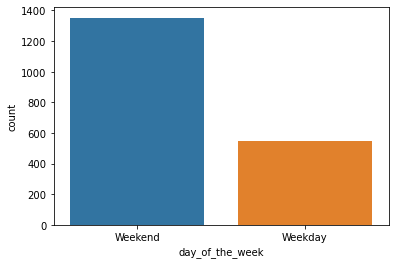

In [196]:
sns.countplot(x='day_of_the_week',data=df)

#### Observation

Weekend orders have the highest frequency (more than double the number of weekday orders).

#### Rating

<AxesSubplot:xlabel='rating', ylabel='count'>

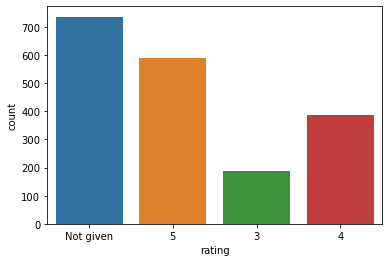

In [206]:
sns.countplot(x='rating',data=df)

#### Observation

- The amount of rating 'not_given' has the highest count.
- Rating number 5 has the second highest frequency.

#### Food_preparation_time

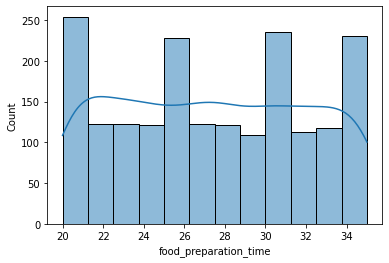

In [50]:
sns.histplot(data=df, x='food_preparation_time',kde=True)
plt.show()

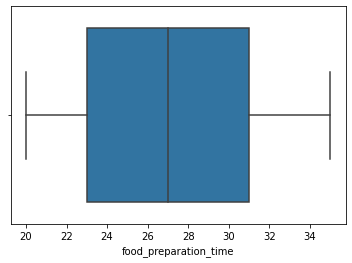

In [51]:
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

#### Observation


- Food_preparation_time has a relatively uniform distribution.

#### Delivery_time

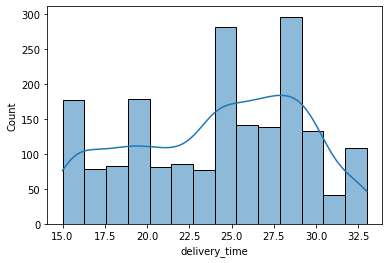

In [52]:
sns.histplot(data=df, x='delivery_time',kde=True)
plt.show()

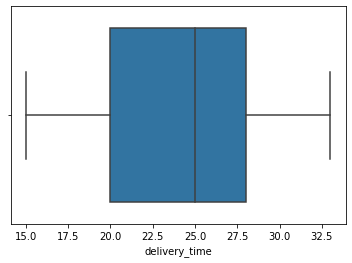

In [55]:
sns.boxplot(data=df, x='delivery_time')
plt.show()

#### Observation


- 50% of the orders where delivered in 25minutes or less
- there are no outliers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [71]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observation

The top 5 restaurants are Shake Shack,The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm respectively.

### Question 8: Which is the most popular cuisine on weekends? [1 mark]

In [92]:
df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observation

The most popular cuisine on weekends is American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [115]:
#to filter the orders that cost more tha 20 dollars
cost_greater_than_20=df[df['cost_of_the_order']>20]
#to get the percentage
cost_greater_than_20.shape[0]/df.shape[0]*100

29.24130663856691

##### The percentage of orders which costs more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [108]:
df['delivery_time'].mean()

24.161749209694417

##### mean order delievery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. 
### Find the IDs of these customers and the number of orders they placed. [1 mark]

In [111]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### rating vs delivery_time

<Figure size 1080x504 with 0 Axes>

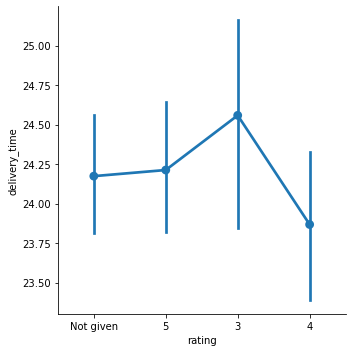

In [212]:
plt.figure(figsize=(15, 7))
sns.catplot(data=df, x='rating', y='delivery_time', kind='point');

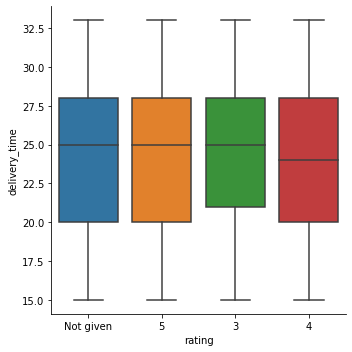

In [138]:
sns.catplot(data=df, x='rating', y='delivery_time', kind='box');

#### rating vs food_preparation_time

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

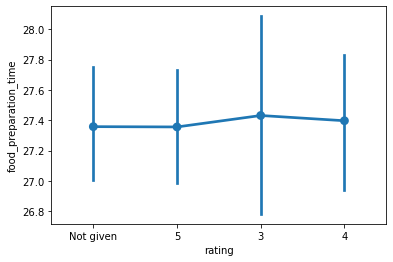

In [136]:
sns.pointplot(data=df, x='rating', y='food_preparation_time')

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

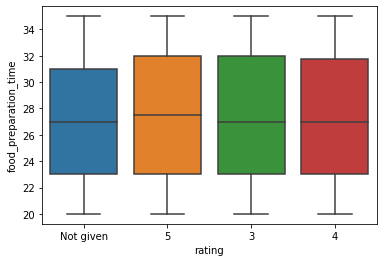

In [139]:
sns.boxplot(data=df, x='rating', y='food_preparation_time')

#### rating vs cost_of_the_order

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

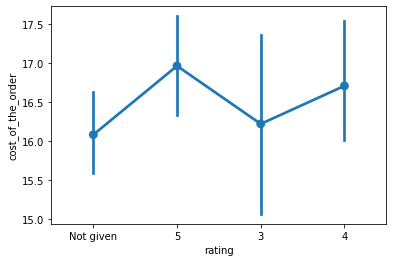

In [137]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order')

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

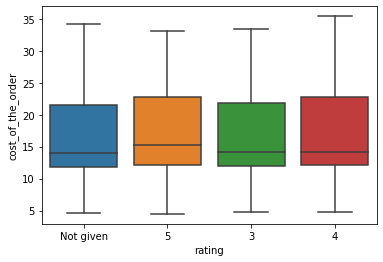

In [140]:
sns.boxplot(data=df, x='rating', y='cost_of_the_order')

#### cost_of_the_order vs delivery_time

<AxesSubplot:xlabel='cost_of_the_order', ylabel='delivery_time'>

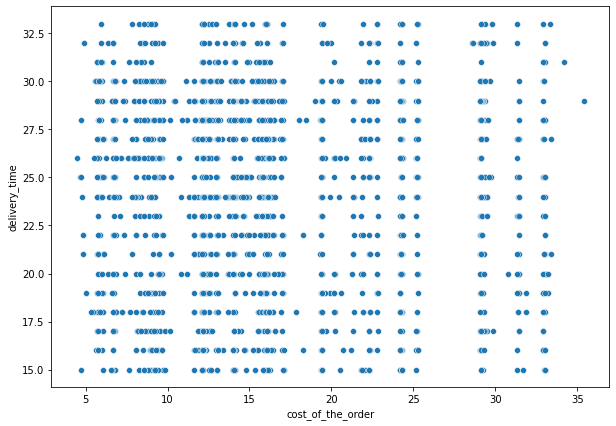

In [149]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df ,x='cost_of_the_order',y='delivery_time')

#### cost_of_the_order vs cuisine_type

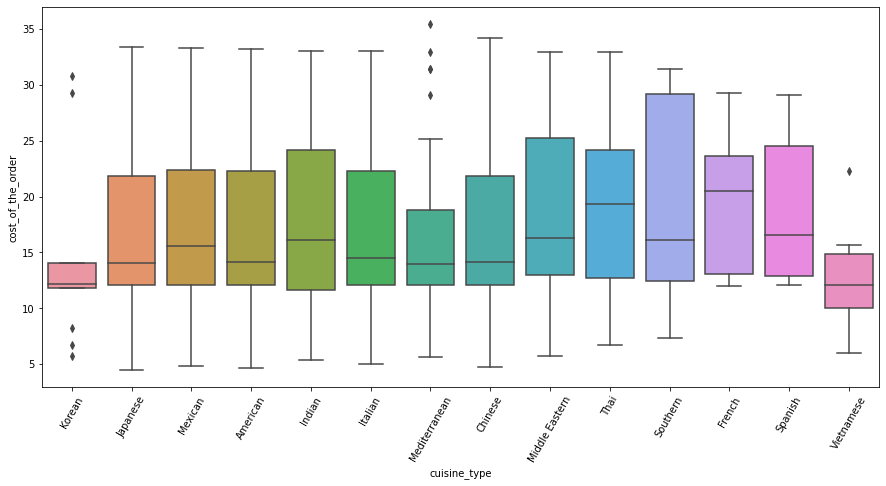

In [210]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation = 60)
plt.show()

#### food_preparation_time vs cuisine_type

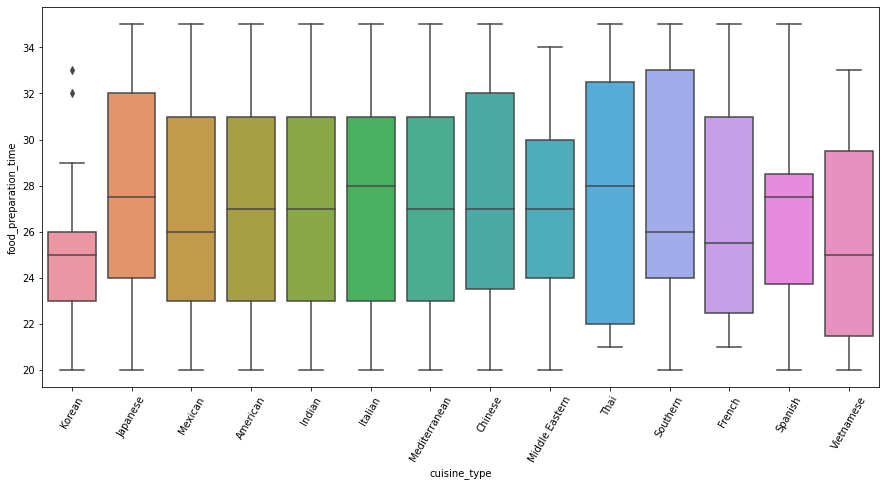

In [211]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 60)
plt.show()

#### day_of_the_week vs delivery_time

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

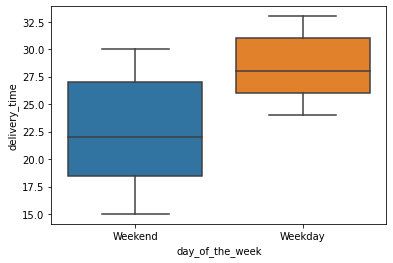

In [152]:
#plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')

#### Observation

Delivery time is much lower during weekends

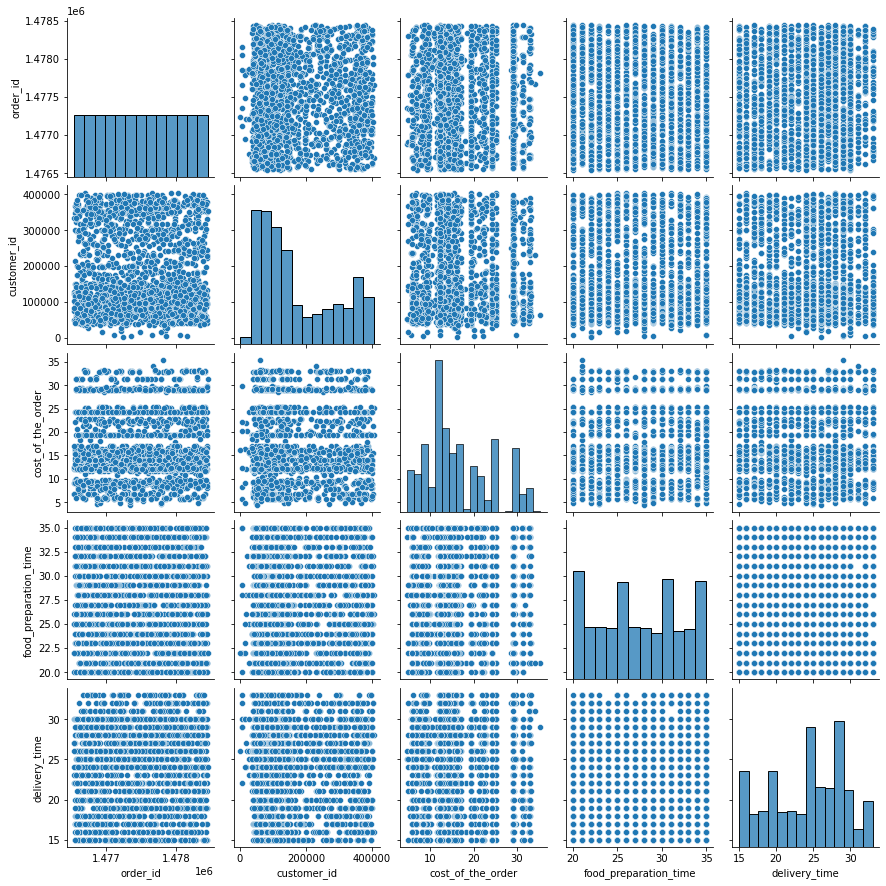

In [217]:
sns.pairplot(data=df[['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']])

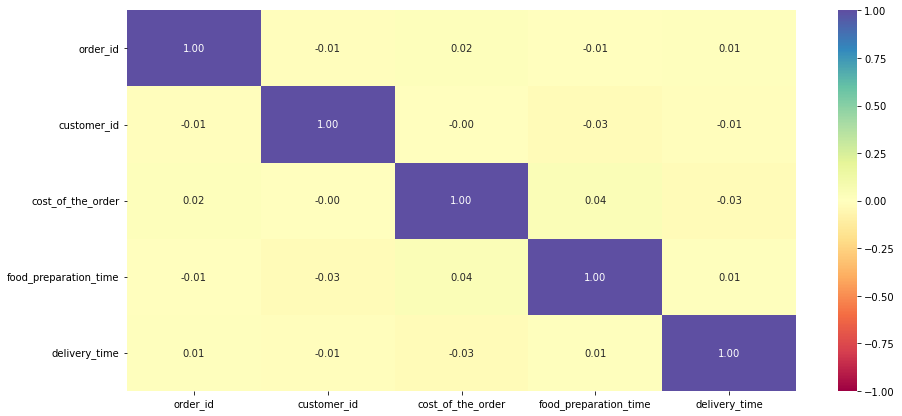

In [216]:
plt.figure(figsize=(15,7))
sns.heatmap(data=df[['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True,  vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

#### Observations 

- Correlation matrix confirms that no correlation exists between the variables.
- Delivery times are much lower during weekends.
- Rating does not seem to be influenced by any of the other variables.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [168]:
# get restaurants with rating count of >50 and avg rating > 4

# first, we remove the 'Not given' rows from the dataframe and create a new dataframe
df_rated = df[df['rating'] != 'Not given'].copy()
# next, we set the rating values to int so that we can take the average
df_rated['rating'] =df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']


# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()


# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [173]:
def rev_generated(x):
    if x >20:
        return x*0.25
    elif x>5:
        return x*0.15
    else:
        return x*0

df['revenue']=df['cost_of_the_order'].apply(rev_generated)

df.head()
total_rev=df['revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [208]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# filter orders with over 60 min total time
time_over_60 = df[df['total_time']>60]
#time_over_60.shape[0]
# calculate the percentage of the whole dataset
percentage_over_60 = time_over_60.shape[0] / df.shape[0] * 100
print(f'Percentage of orders over 60 min is {str(round(percentage_over_60, 2))}')

Percentage of orders over 60 min is 10.54


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [180]:
# calculate the mean_delivery_time_weekdays
mean_delivery_time_weekdays=df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean delivery time on weekdays is around', 
      round(mean_delivery_time_weekdays),
     'minutes')

# calculate the mean_delivery_time_weekends
mean_delivery_time_weekends=df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time on weekends is around', 
      round(mean_delivery_time_weekends),
     'minutes')
print(f'Weekend delivery is faster by {str(round(mean_delivery_time_weekdays - mean_delivery_time_weekends))} minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes
Weekend delivery is faster by 6 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

- Ratings not given are very high in number.
- Delivery times are generally higher during the weekdays compared to weekends
- American cuisines are the highest in demand by the customers', second to Japanese and then Italian both during weekdays and weekends.
- Food preparation time and delivery time seem to have very little influence rating.
- Number of orders recieved during weekends are more than twice the number of orders recieved throughout weekdays.

### Recomendations:

- Consider encouraging customer to leave feedbacks/ratings as it will be very essential in improving customers' satisfaction rate.
- Company should target more restaurants providing cuisine types such as American, Japanese and Italian as they are peoples' favourite.
- Food preparation and delivery times has shown to have a little influence on ratings, hence company should consider possible ways to improve these factors as it can be useful for more customer satisfaction.  